In [2]:
from pathlib import Path
from h5py import File
from PIL import Image
from torchvision import transforms as T
# Nasty import because I did not make a package for the POC
from sys import path
path.append('src')
from src.clip import IMAGE_SIZE

In [4]:
h5 = File('./outputs/filename_to_frame_output.h5')
file = next(iter(h5))
bboxes = h5[file]['bboxes'][...]
scores = h5[file]['scores'][...]

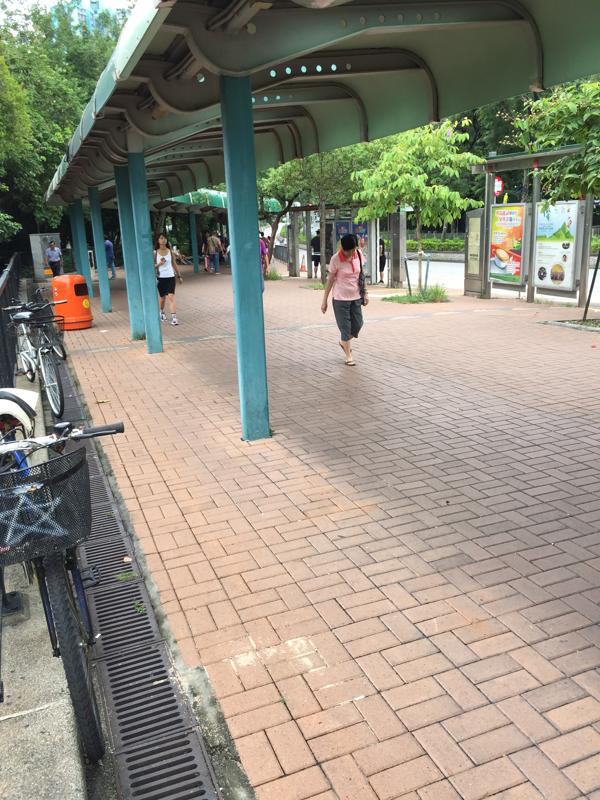

In [5]:
img = Image.open(Path.home() / 'data' / 'frames' / file)
img


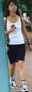

In [6]:
crops = [
    img.crop(bbox)
    for bbox, score in zip(bboxes, scores)
    if score > .8
]
crops[0]

In [7]:
crop = crops[0]

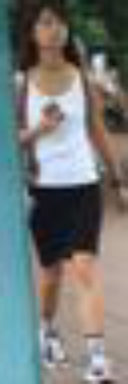

In [8]:
MEAN = [0.48145466, 0.4578275, 0.40821073]
STD = [0.26862954, 0.26130258, 0.27577711]
preprocess_crop = T.Compose([
    T.Resize(IMAGE_SIZE),
    # T.ToTensor(),
    # T.Normalize(MEAN, STD),
    # T.ToPILImage()
])

preprocess_crop(crop)